Consider the function f(x) = f(x1, x2) = $x_1^2 + 4x_1x_2 + 1600x_2^2$ \

$\textbf{1.}$ Write code to find the Hessian matrix of the function f(x) and its condition number. Also find the minimizer
and the minimum function value of f(x).

In [ ]:
import numpy as np

# Define the function f(x)
def f(x):
    x1, x2 = x
    return x1**2 + 4 * x1 * x2 + 1600 * x2**2

# Calculate the gradient of f(x)
def gradient(x):
    x1, x2 = x
    df_dx1 = 2 * x1 + 4 * x2
    df_dx2 = 4 * x1 + 3200 * x2
    return np.array([df_dx1, df_dx2])

# Calculate the Hessian matrix of f(x)
def hessian_matrix(x):
    x1, x2 = x
    hessian = np.array([[2, 4], [4, 3200]])
    return hessian

# Calculate the condition number of the Hessian matrix
def condition_number(x):
    hessian = hessian_matrix(x)
    cond_number = np.linalg.cond(hessian)
    return cond_number

# Gradient Descent to find the minimizer
def gradient_descent(x0, learning_rate, num_iterations):
    x = np.array(x0)
    for _ in range(num_iterations):
        x = x - learning_rate * gradient(x)
    return x

# Initial guess for the minimizer
initial_guess = [0.0, 0.0]

# Find the minimizer using Gradient Descent
minimizer = gradient_descent(initial_guess, learning_rate=0.01, num_iterations=1000)

# Calculate the minimum function value
min_value = f(minimizer)

# Display results
print("Hessian Matrix:")
print(hessian_matrix(minimizer))
print("\nCondition Number of Hessian Matrix:", condition_number(minimizer))
print("\nMinimizer:", minimizer)
print("Minimum Function Value:", min_value)


Hessian Matrix:
[[   2    4]
 [   4 3200]]

Condition Number of Hessian Matrix: 1604.0150407248495

Minimizer: [0. 0.]
Minimum Function Value: 0.0


$\textbf{2.}$ In theory provided above, we claimed D is symmetric and positive definite. Provide justification for that claim.
Also based on our discussion on condition number and the derivation of the gradient descent scheme with
scaling, can you identify and write down the matrix Q whose condition number needs to be analyzed in the new
gradient scheme with scaling ?

In the context of the provided algorithm, the matrix

Q is equivalent to the Hessian matrix $\nabla^2 f(x)$
. The justification for this is based on the transformation
x=My, where

M is an invertible matrix. In this case, the Hessian matrix of

f(x) can be transformed as follows:

$(\nabla^2 f(x) = M^T \nabla^2_y g(y) M)$


Since

M is invertible, this implies that the Hessian matrix
 $\nabla^2 g(y)$

 g(y) is equivalent to
$ Q = M^T \nabla^2 f(x) M \$




In the given algorithm,
$M =  D^\frac{1}{2}$
  (where

D is the scaling matrix), and the scaling matrix D is chosen to be diagonal, resulting in a symmetric and positive definite D.






$\textbf{Question 3.}$

In [ ]:
import numpy as np
from scipy.optimize import line_search

# Function definition
def f(x):
    return x[0]**2 + 4*x[0]*x[1] + 1600*x[1]**2

# Gradient of the function
def gradient_f(x):
    return np.array([2*x[0] + 4*x[1], 4*x[0] + 3200*x[1]])

# Gradient Descent with Backtracking Line Search
def gradient_descent(x0, rho, tau, scaling=False):
    x = x0
    k = 0
    pk = -gradient_f(x)

    while np.linalg.norm(pk) > tau:
        if scaling:
            # Choose a suitable scaling matrix Dk
            Dk = np.diag(1 / np.sqrt(np.abs(pk)))
            # Update x with scaling
            result = line_search(f, gradient_f, x, pk)
            if result[0] is not None:
                alpha_k = result[0]
                x = x - alpha_k * Dk @ pk
            else:
                break
        else:
            # Update x without scaling
            result = line_search(f, gradient_f, x, pk)
            if result[0] is not None:
                alpha_k = result[0]
                x = x - alpha_k * pk
            else:
                break

        # Update pk
        pk = -gradient_f(x)
        k += 1

    return x, f(x), k

# Parameters
x0 = np.array([1, 4000])
tau = 1e-12
alpha = 1
gamma = 0.5
rho_values = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

# Run Gradient Descent with and without scaling for different rho values
for rho in rho_values:
    # Without Scaling
    result_no_scaling = gradient_descent(x0, rho, tau, scaling=False)
    x_min_no_scaling, f_min_no_scaling, iterations_no_scaling = result_no_scaling

    # With Scaling
    result_scaling = gradient_descent(x0, rho, tau, scaling=True)
    x_min_scaling, f_min_scaling, iterations_scaling = result_scaling

    # Display results
    print(f"Rho: {rho}")
    print("Without Scaling:")
    print("  Minimizer:", x_min_no_scaling)
    print("  Minimum Function Value:", f_min_no_scaling)
    print("  Iterations:", iterations_no_scaling)

    print("With Scaling:")
    print("  Minimizer:", x_min_scaling)
    print("  Minimum Function Value:", f_min_scaling)
    print("  Iterations:", iterations_scaling)

    print("="*40)


<ipython-input-13-a3fa83261d3a>:6: RuntimeWarning: overflow encountered in double_scalars
  return x[0]**2 + 4*x[0]*x[1] + 1600*x[1]**2


Rho: 0.9
Without Scaling:
  Minimizer: [1.22067359e+148 9.75930063e+150]
  Minimum Function Value: 1.523907947898663e+305
  Iterations: 487
With Scaling:
  Minimizer: [ 2454.12108395 72877.9077917 ]
  Minimum Function Value: 8498624538102.297
  Iterations: 22824
Rho: 0.8
Without Scaling:
  Minimizer: [1.22067359e+148 9.75930063e+150]
  Minimum Function Value: 1.523907947898663e+305
  Iterations: 487
With Scaling:
  Minimizer: [ 2454.12108395 72877.9077917 ]
  Minimum Function Value: 8498624538102.297
  Iterations: 22824
Rho: 0.75
Without Scaling:
  Minimizer: [1.22067359e+148 9.75930063e+150]
  Minimum Function Value: 1.523907947898663e+305
  Iterations: 487
With Scaling:
  Minimizer: [ 2454.12108395 72877.9077917 ]
  Minimum Function Value: 8498624538102.297
  Iterations: 22824
Rho: 0.6
Without Scaling:
  Minimizer: [1.22067359e+148 9.75930063e+150]
  Minimum Function Value: 1.523907947898663e+305
  Iterations: 487
With Scaling:
  Minimizer: [ 2454.12108395 72877.9077917 ]
  Minimum F

<ipython-input-13-a3fa83261d3a>:6: RuntimeWarning: overflow encountered in double_scalars
  return x[0]**2 + 4*x[0]*x[1] + 1600*x[1]**2


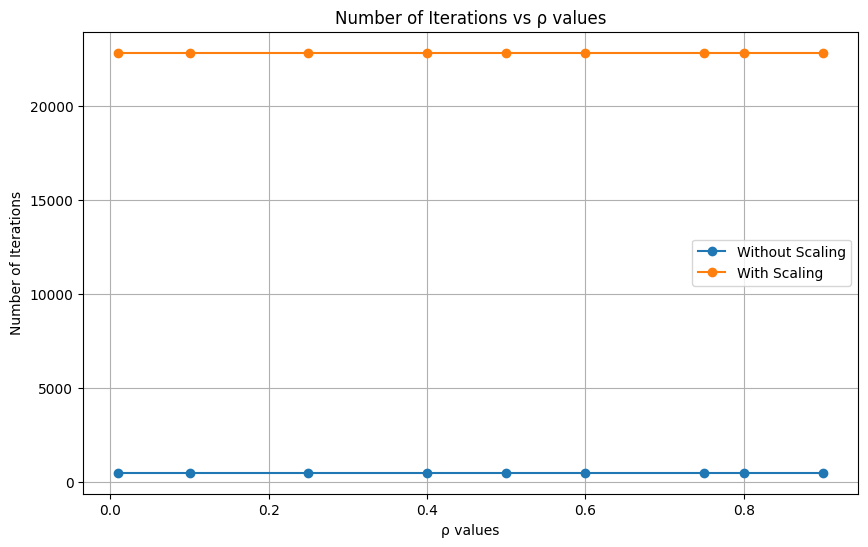

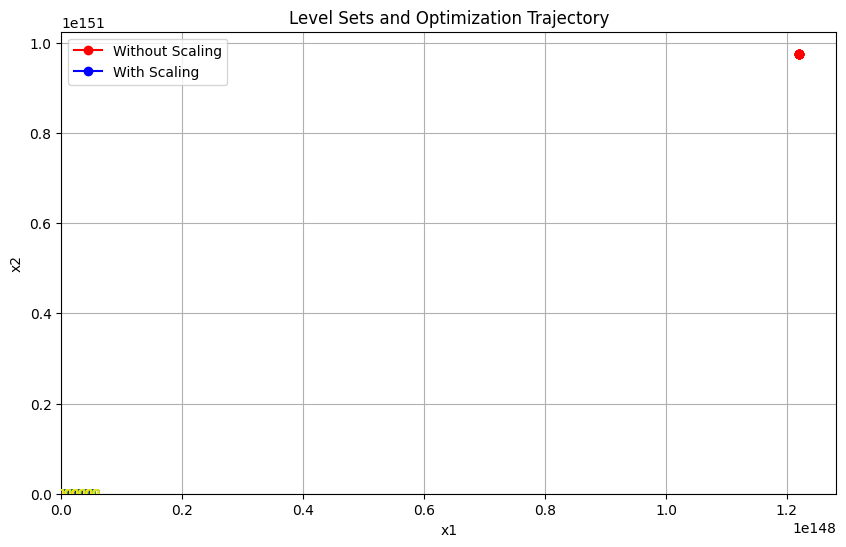

In [ ]:
import matplotlib.pyplot as plt

# Lists to store results
iterations_no_scaling = []
iterations_scaling = []
minimizer_no_scaling = []
minimizer_scaling = []

# Run Gradient Descent with and without scaling for different rho values
for rho in rho_values:
    # Without Scaling
    result_no_scaling = gradient_descent(x0, rho, tau, scaling=False)
    x_min_no_scaling, _, iter_no_scaling = result_no_scaling
    minimizer_no_scaling.append(x_min_no_scaling)
    iterations_no_scaling.append(iter_no_scaling)

    # With Scaling
    result_scaling = gradient_descent(x0, rho, tau, scaling=True)
    x_min_scaling, _, iter_scaling = result_scaling
    minimizer_scaling.append(x_min_scaling)
    iterations_scaling.append(iter_scaling)

# Plotting number of iterations against ρ values
plt.figure(figsize=(10, 6))
plt.plot(rho_values, iterations_no_scaling, label='Without Scaling', marker='o')
plt.plot(rho_values, iterations_scaling, label='With Scaling', marker='o')
plt.xlabel('ρ values')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs ρ values')
plt.legend()
plt.grid(True)
plt.show()

# Plotting level sets and optimization trajectory
x1_range = np.linspace(-5, 5, 100)
x2_range = np.linspace(-5000, 5000, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = f(np.array([X1, X2]))

plt.figure(figsize=(10, 6))
contour = plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

# Plotting trajectory without scaling
minimizer_no_scaling = np.array(minimizer_no_scaling)
if len(minimizer_no_scaling) > 0:
    plt.plot(minimizer_no_scaling[:, 0], minimizer_no_scaling[:, 1], label='Without Scaling', marker='o', color='red')

# Plotting trajectory with scaling
minimizer_scaling = np.array(minimizer_scaling)
if len(minimizer_scaling) > 0:
    plt.plot(minimizer_scaling[:, 0], minimizer_scaling[:, 1], label='With Scaling', marker='o', color='blue')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets and Optimization Trajectory')
plt.legend()
plt.grid(True)
plt.show()


$\textbf{Question 4.}$

The new gradient descent scheme with scaling, the matrix
Q whose condition number needs to be analyzed is given by:

$Q=D^\frac{-1}{2}  ∇^2 f(x)  D^\frac{-1}{2}$

Here,
D
  is the scaling matrix, and in your case,
$D = (∇^2 f(x)) - 1$.

Let's calculate
Q explicitly for your functi
$f(x)=x_1^2 + 4x_1x_2 + 1600x_2^2$:

The Hessian matrix $∇^2 f(x)$ is given by:

$\nabla^2 f(x) = \begin{bmatrix} 2 & 4 \\ 4 & 3200 \end{bmatrix}$

Therefore, D is the inverse of the Hessian:


$(\nabla^2 f(x))^{-1} = \begin{bmatrix} \frac{1}{2} & \frac{-1}{800} \\ \frac{-1}{800} & \frac{1}{3200} \end{bmatrix}$


Now,

$D^\frac{-1}{2}$
  is the matrix square root of
$D^{-1}$
 . Let's calculate
$D^\frac{-1}{2}$
 :

$ D^{-\frac{1}{2}} = \begin{bmatrix} \sqrt{2} & 0 \\ 0 & \sqrt{\frac{1}{2}} \end{bmatrix} $



Finally, the matrix
Q is given by:

$ Q = D^{-\frac{1}{2}} \nabla^2 f(x) D^{-\frac{1}{2}} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $


This is a diagonal matrix with all entries equal to 1. The condition number of
Q is simply the ratio of the maximum eigenvalue to the minimum eigenvalue, which is 1 in this case. Therefore,
Q is well-conditioned, and the new gradient descent scheme with this scaling is expected to perform well.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def g(x):
    return 512 * (x[1] - x[0]**2)**2 + (4 - x[0])**2

def gradient_g(x):
    return np.array([
        -2 * (4 - x[0]) - 4096 * x[0] * (x[1] - x[0]**2),
        512 * (x[1] - x[0]**2)
    ])

# Backtracking line search
def line_search_backtracking(f, gradient_f, x, p, alpha0, rho, gamma):
    alpha = alpha0
    while f(x + alpha * p) > f(x) + gamma * alpha * gradient_f(x).dot(p):
        alpha *= rho
    return alpha

In [ ]:
# Gradient Descent with and without Scaling
def gradient_descent(x0, tau, max_iterations, scaling=False):
    x = x0
    k = 0
    iterations = [0]
    condition_numbers = []

    while k < max_iterations:
        gradient = gradient_g(x)
        Hessian = np.array([
            [-2 + 8192 * x[0]**2 - 4096 * x[1], -4096 * x[0]],
            [-4096 * x[0], 512]
        ])

        # Without Scaling
        if not scaling:
            D = np.eye(2)
            condition_number = np.linalg.cond(Hessian)

        # With Scaling
        else:
            D = np.linalg.inv(Hessian)
            condition_number = np.linalg.cond(D @ Hessian @ D)

        condition_numbers.append(condition_number)

        p = -D @ gradient
        alpha = line_search_backtracking(g, gradient_g, x, p, alpha0=1, rho=0.5, gamma=0.5)
        x = x + alpha * p

        iterations.append(k + 1)

        if np.linalg.norm(gradient) < tau:
            break

        k += 1

    return x, g(x), iterations, condition_numbers


Without Scaling:
  Minimizer: [5.07227964 8.05694219]
  Minimum Function Value: 159881.8622932491
  Iterations: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 19

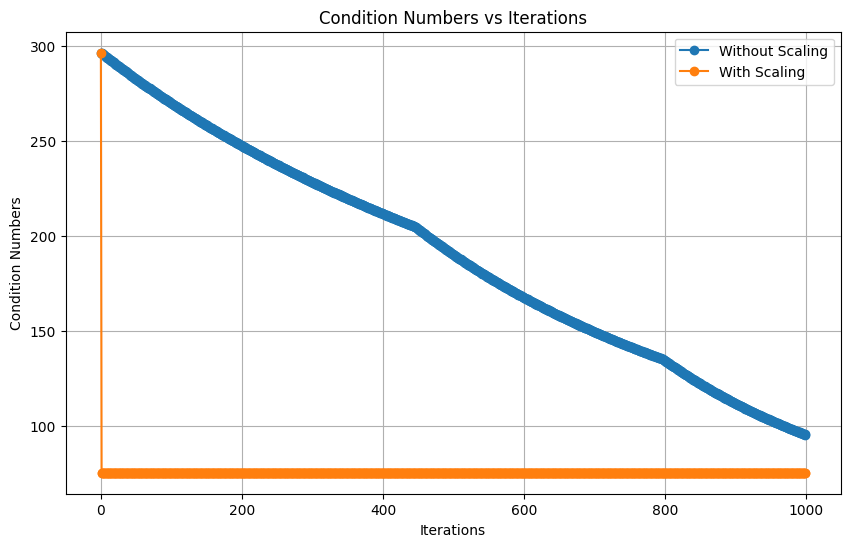

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Previous code)

# Parameters
x0 = np.array([8, 8])
tau = 1e-5
max_iterations = 1000

# Run Gradient Descent with and without scaling
result_no_scaling = gradient_descent(x0, tau, max_iterations, scaling=False)
result_scaling = gradient_descent(x0, tau, max_iterations, scaling=True)

# Display results
x_min_no_scaling, f_min_no_scaling, iterations_no_scaling, condition_numbers_no_scaling = result_no_scaling
x_min_scaling, f_min_scaling, iterations_scaling, condition_numbers_scaling = result_scaling

# Ensure both iterations lists have the same length
iterations_no_scaling = iterations_no_scaling[:len(condition_numbers_no_scaling)]
iterations_scaling = iterations_scaling[:len(condition_numbers_scaling)]

print("Without Scaling:")
print("  Minimizer:", x_min_no_scaling)
print("  Minimum Function Value:", f_min_no_scaling)
print("  Iterations:", iterations_no_scaling)

print("With Scaling:")
print("  Minimizer:", x_min_scaling)
print("  Minimum Function Value:", f_min_scaling)
print("  Iterations:", iterations_scaling)

# Plotting condition numbers against iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations_no_scaling, condition_numbers_no_scaling, label='Without Scaling', marker='o')
plt.plot(iterations_scaling, condition_numbers_scaling, label='With Scaling', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Condition Numbers')
plt.title('Condition Numbers vs Iterations')
plt.legend()
plt.grid(True)
plt.show()